In [5]:
import pandas as pd
 
df = pd.read_csv("../Proyecto/Data/heroes_completo_limpio.csv")

In [6]:
df.head()

,ID,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate,Genero,Etnia,Altura,Peso,Color_Ojos,Color_Pelo,Nombre Completo,Alias,Lugar de nacimiento,Primera aparición,Editor,Alineación
0,1,A-Bomb,38,100,17,80,24,64,Male,Human,203 cm,441 kg,Yellow,No Hair,Richard Milhouse Jones,Rick Jones,"Scarsdale, Arizona","Hulk Vol 2 #2 (April, 2008) (as A-Bomb)",Marvel Comics,good
1,2,Abe Sapien,88,28,35,65,100,85,Male,Icthyo Sapien,191 cm,65 kg,Blue,No Hair,Abraham Sapien,"Langdon Everett Caul, Abraham Sapien, Langdon ...",-,Hellboy: Seed of Destruction (1993),Dark Horse Comics,good
2,3,Abin Sur,50,90,53,64,99,65,Male,Ungaran,185 cm,90 kg,Blue,No Hair,NaN,Lagzia,Ungara,"Showcase #22 (October, 1959)",DC Comics,good
3,4,Abomination,63,80,53,90,62,95,Male,Human / Radiation,203 cm,441 kg,Green,No Hair,Emil Blonsky,"Agent R-7, Ravager of Worlds","Zagreb, Yugoslavia",Tales to Astonish #90,Marvel Comics,bad
4,5,Abraxas,88,63,83,100,100,55,Male,Cosmic Entity,0 cm,0 kg,Blue,Black,Abraxas,-,Within Eternity,Fantastic Four Annual #2001,Marvel Comics,bad


In [7]:
import numpy as np
import requests
import json
import pandas as pd
from pprint import pprint
from time import sleep
import matplotlib
import matplotlib.pyplot as plt
import random
import seaborn as sns
import sys

In [8]:
def limpiar_columnas(x):
    if x is None:
        return np.nan
    if x == "Sin dato":
        return np.nan
    try:
        return float(x)
    except:
        return np.nan

df["Inteligencia"] = df["Inteligencia"].map(limpiar_columnas)
df["Fuerza"] = df["Fuerza"].map(limpiar_columnas)
df["Velocidad"] = df["Velocidad"].map(limpiar_columnas)
df["Potencia"] = df["Potencia"].map(limpiar_columnas)
df["Combate"] = df["Combate"].map(limpiar_columnas)
df["Durabilidad"] = df["Durabilidad"].map(limpiar_columnas)

df1 = df

In [9]:
df1 = df1.drop(["ID","Genero","Altura","Peso","Nombre Completo", "Alias", "Lugar de nacimiento" , "Primera aparición" , "Editor", "Alineación", "Color_Ojos", "Color_Pelo", "Etnia"], axis=1)

In [10]:
df1.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
1,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
2,Abin Sur,50.0,90.0,53.0,64.0,99.0,65.0
3,Abomination,63.0,80.0,53.0,90.0,62.0,95.0
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0


<h4>1 - ¿Cual es el superheroe con más potencia, más veloz y más poder de combate? En base a combinar estas 3 habilidades ¿Cuál es el superheroe con mayores capacidades?<h4>

In [11]:
potencia_max = df1["Potencia"].max() #Super heroe con potencia
df_max_potencia = df1[df1["Potencia"] == potencia_max]

velocidad_max = df1["Velocidad"].max() #Super heroe con velocidad 
df_max_velocidad = df1[df1["Velocidad"] == velocidad_max]

combate_max = df1["Combate"].max() #Super heroe con combate 
df_max_combate = df1[df1["Combate"] == combate_max]

df_max_val = df1[ #Super heroes que tiene las máximas 3 habilidades 
    (df1["Potencia"] >= 100) &
    (df1["Velocidad"] >= 100) &
    (df1["Combate"] >= 100.0)
]

- Super heroes con más potencia

In [12]:
df_max_potencia.head() 

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
1,Abe Sapien,88.0,28.0,35.0,65.0,100.0,85.0
4,Abraxas,88.0,63.0,83.0,100.0,100.0,55.0
6,Adam Monroe,63.0,10.0,12.0,100.0,100.0,64.0
11,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
13,Alan Scott,63.0,80.0,23.0,90.0,100.0,32.0


- Super heroes con más velocidad

In [13]:
df_max_velocidad.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
11,Air-Walker,50.0,85.0,100.0,85.0,100.0,40.0
41,Ardina,63.0,100.0,100.0,80.0,100.0,25.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
92,Bizarro,38.0,95.0,100.0,100.0,100.0,85.0
95,Black Bolt,75.0,67.0,100.0,84.0,100.0,56.0


- Super heroes con más combate

In [14]:
df_max_combate.head() 

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
42,Ares,75.0,82.0,35.0,80.0,84.0,101.0


- Super heroes con mayor potencia, velocidad y combate

In [15]:
df_max_val 

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
425,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
502,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0


- Explicación

Podemos observar que en los datos se encuentran muchos superheroes con capicades muy altas tanto en potencia como en velocidad. En relación al combate hay un superheroe que resalta con una capacidad por encima de todas. Abajo podemos detallar que hay 151 y 31 superheroes con potencia y velocidad 100 respectivamente y 1 solo superheroe con combate de 101.

Por esta razón aplicamos un filtrado más para extraer a los superheroes que tenga estas 3 habilidades al 100.

In [16]:
cantidad_potencia = df_max_potencia.shape[0] #Cantidad de superheroes con potencia 100.
cantidad_velocidad = df_max_velocidad.shape[0] #Cantidad de superheroes con velocidad 100.
cantidad_combate = df_max_combate.shape[0] #Cantidad de superheroes con combate 100 o más.
cantidad_max_val = df_max_val.shape[0] #Superheroes con mayor potencia, velocidad y combate.

- En este gráfico podemos observar cuantos superheroes con valor de 100 o mas hay por cada habilidad.

<function matplotlib.pyplot.show(close=None, block=None)>

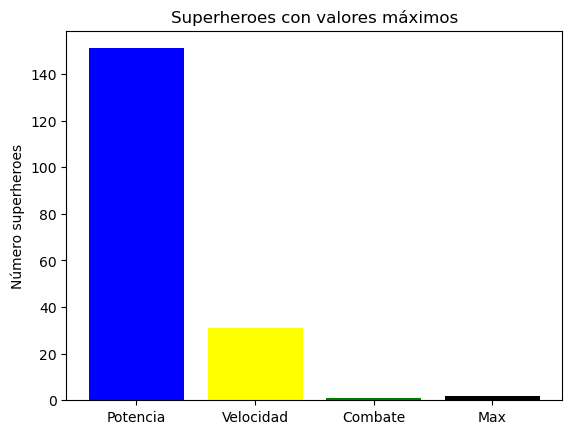

In [17]:
estadisticas = ["Potencia" , "Velocidad" , "Combate" , "Max"]
cantidades = [cantidad_potencia, cantidad_velocidad, cantidad_combate, cantidad_max_val]
colores = ["blue" , "yellow", "green" , "black"]

plt.bar(estadisticas, cantidades, color=colores)
plt.ylabel("Número superheroes")
plt.title("Superheroes con valores máximos")
plt.show

- En este gráfico podemos comparar las habilidades y su relación entre si. 

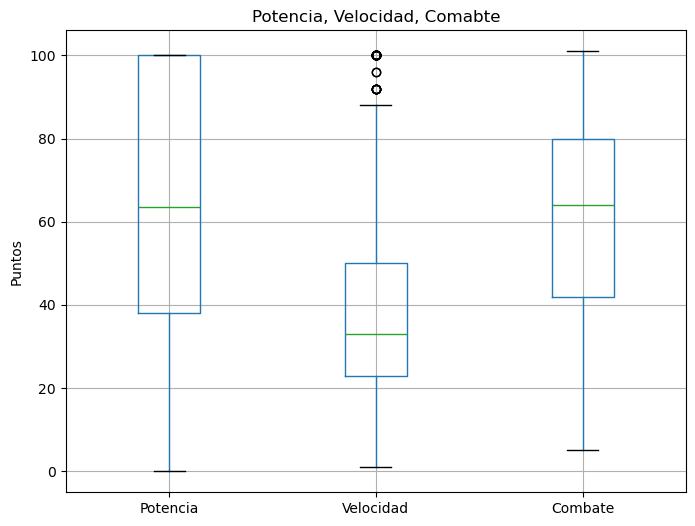

In [62]:
columnas = ["Potencia", "Velocidad", "Combate"]

# Dibujar boxplots
plt.figure(figsize=(8, 6))
df1[columnas].boxplot()
plt.title("Potencia, Velocidad, Comabte")
plt.ylabel("Puntos")
plt.show()

<h4>2 - ¿En base a promediar la inteligencia y la fuerza, ¿Cual es el superheroe que combinada estas dos habilidades tiene el mayor y menor promedio y cuán lejos estan del promedio general?<h4>

In [19]:
inteligencia_max = df1["Inteligencia"].max() #Super heroe más inteligente
df_max_inteligencia = df1[df1["Inteligencia"] == inteligencia_max]

fuerza_max = df1["Fuerza"].max() #Super heroe más fuerte
df_max_fuerza = df1[df1["Fuerza"] == fuerza_max]

menos_inteligente = df1["Inteligencia"].min() #Super heroe menos inteligente
df_menos_inteligente = df1[df1["Inteligencia"] == menos_inteligente]

menos_fuerte = df1["Fuerza"].min()  #Super heroe menos fuerte
df_menos_fuerte = df1[df1["Fuerza"] == menos_fuerte]

df_max_val_2 = df1[
    (df1["Inteligencia"] >= 100) &
    (df1["Fuerza"] >= 100)     
]

- Super heroes más inteligentes

In [20]:
df_max_inteligencia.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
29,Ant-Man,100.0,18.0,23.0,28.0,32.0,32.0
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
69,Batman,100.0,26.0,27.0,50.0,47.0,100.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
135,Brainiac,100.0,95.0,63.0,90.0,60.0,75.0


- Super heroes más fuertes

In [21]:
df_max_fuerza.head()

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
0,A-Bomb,38.0,100.0,17.0,80.0,24.0,64.0
19,Amazo,63.0,100.0,83.0,100.0,100.0,100.0
31,Anti-Monitor,88.0,100.0,50.0,100.0,100.0,90.0
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
41,Ardina,63.0,100.0,100.0,80.0,100.0,25.0


- Super heroe menos inteligente

In [22]:
df_menos_inteligente

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
350,Jack-Jack,6.0,34.0,67.0,80.0,100.0,6.0


- Super heroes menos fuertes

In [23]:
df_menos_fuerte

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
383,Kid Flash,25.0,4.0,92.0,42.0,20.0,30.0
538,Rachel Pirzad,63.0,4.0,8.0,10.0,52.0,10.0


- Super heroes con mayor intelegencia y fuerza

In [24]:
df_max_val_2

,Nombre,Inteligencia,Fuerza,Velocidad,Durabilidad,Potencia,Combate
34,Apocalypse,100.0,100.0,33.0,100.0,100.0,60.0
79,Beyonder,100.0,100.0,100.0,100.0,100.0,84.0
272,Galactus,100.0,100.0,83.0,100.0,100.0,50.0
409,Living Tribunal,100.0,100.0,100.0,100.0,100.0,30.0
425,Man of Miracles,100.0,100.0,100.0,100.0,100.0,100.0
502,One-Above-All,100.0,100.0,100.0,100.0,100.0,100.0
516,Phoenix,100.0,100.0,83.0,100.0,100.0,80.0
654,Thanos,100.0,100.0,33.0,100.0,100.0,80.0


- Explicación

Podemos observar que hay 8 super heroes que resalta por tener una fuerza e inteligencia del 100. Podriamos decir que estos super heroes estarian muy igualados a la hora de un combate si tomamos en cuantas estos dos valores.

En el caso de los super heroes menos fuertes e inteligentes, el rango es mucho más pequeño. Encontramos que como super heroe menos inteligente está Jack-Jack, en el caso de menos fuerte, tenemos 2 super herores, Kid Flash y Rachel Pirzad. 

In [25]:
cantidad_inteligencia = df_max_inteligencia.shape[0] #Cantidad de superheroes con inteligencia 100.
cantidad_fuerza = df_max_fuerza.shape[0] #Cantidad de superheroes con fuerza 100.
cantidad_val_max_fuerza_inteligencia = df_max_val_2.shape[0] #Cantidad de superheroes con inteligencia y fuerza 100.
prom_1_1 = df1.loc[350,["Inteligencia", "Fuerza"]].mean() #Jack-Jack: Promodio más bajo de inteligencia y fuerza.
prom_1_2 = df1.loc[383,["Inteligencia", "Fuerza"]].mean() #Kid Flash: Promodio más bajo de inteligencia y fuerza
prom_1_3 = df1.loc[538,["Inteligencia", "Fuerza"]].mean() #Rachel Pirzad: Promodio más bajo de inteligencia y fuerza.


# Cantidades de superhéroes con valores máximos
categorias_cantidades = ["Inteligencia 100", "Fuerza 100", "Inteligencia y Fuerza 100"]
cantidades = [cantidad_inteligencia, cantidad_fuerza, cantidad_val_max_fuerza_inteligencia]

# Promedios de algunos superhéroes específicos
categorias_promedios = ["Jack-Jack", "Kid Flash", "Rachel Pirzad"]
promedios = [prom_1_1, prom_1_2, prom_1_3]


- En el siguiente gráfico vemos una comparación entre cuantos super heroes tienen inteligencia-fuerza 100 y por seperado, entre fuerza e inteligencia.

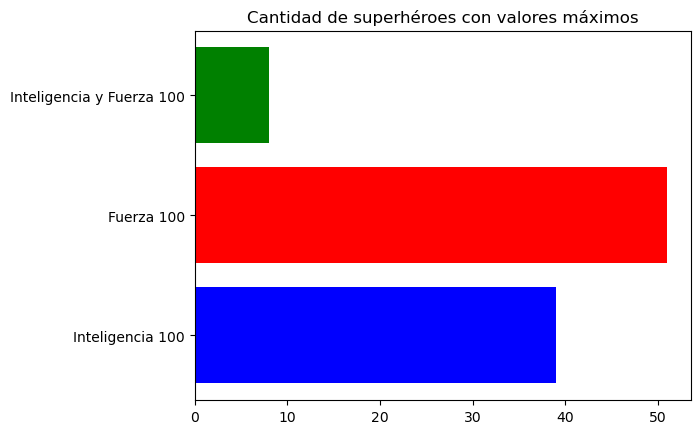

In [26]:
colores_cantidades = ["blue", "red", "green"]

plt.barh(categorias_cantidades, cantidades, color=colores_cantidades)
plt.title("Cantidad de superhéroes con valores máximos")
plt.show()



In [27]:
media_inteligencia = df1["Inteligencia"].mean() #Media de inteligencia de toda la columna
media_fuerza = df1["Fuerza"].mean() #Media de fuerza de toda la columna
media_fuerza_inteligencia = np.mean([media_inteligencia, media_fuerza])
superheroe_mas_inteligente_fuerte = df1.loc[34,["Inteligencia", "Fuerza"]].mean()

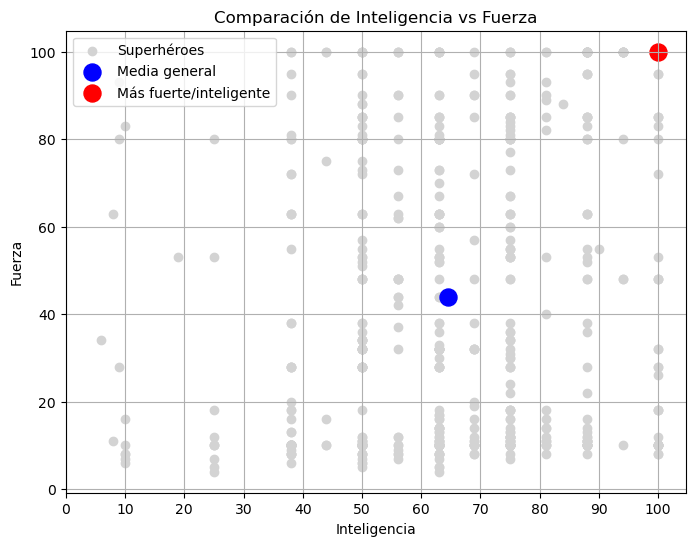

In [61]:
plt.figure(figsize=(8,6))

# Todos los superhéroes
plt.scatter(df1["Inteligencia"], df1["Fuerza"], color="lightgray", label="Superhéroes")

# Media general
plt.scatter(media_inteligencia, media_fuerza, color="blue", s=150, label="Media general")

# Superhéroe más fuerte e inteligente
plt.scatter(df1.loc[34, "Inteligencia"], df1.loc[34, "Fuerza"], color="red", s=150, label="Más fuerte/inteligente")

plt.xlabel("Inteligencia")
plt.ylabel("Fuerza")
plt.title("Comparación de Inteligencia vs Fuerza")
plt.legend()
plt.grid(True)

plt.xticks(range(0, int(df1["Inteligencia"].max())+10, 10))

plt.show()


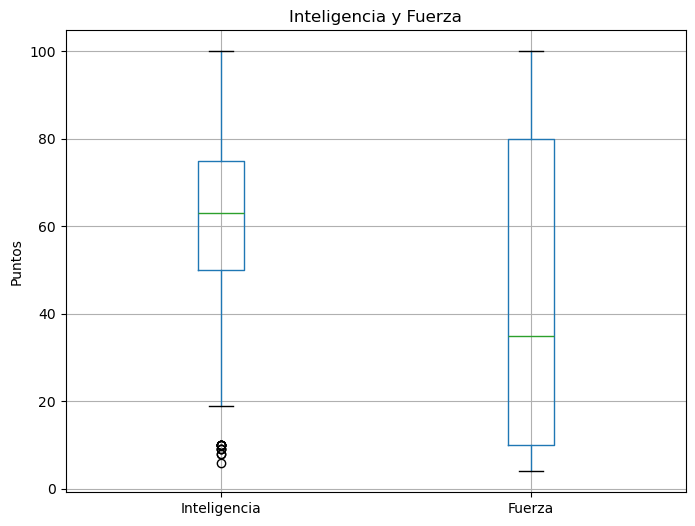

In [57]:
columnas = ["Inteligencia", "Fuerza"]

# Dibujar boxplots
plt.figure(figsize=(8, 6))
df1[columnas].boxplot()
plt.title("Inteligencia y Fuerza")
plt.ylabel("Puntos")
plt.show()